# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Get Weather Data
#for city in cities:
query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + cities[0]
response = requests.get(query).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "cod": "404",
    "message": "city not found"
}


In [19]:
city = []
lat =[]
lng = []
temp = []
temp_max = []
hum = []
cloud = []
wind = []
country = []
date = []

for x in cities:    
    try:
        query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + x
        response = requests.get(query).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(x, "added") 
    
    except:
        print("Error found will skip")
    continue
        
print("END") 
 

Error found will skip
kaitangata added
pevek added
kapit added
cascais added
den chai added
ushuaia added
bluff added
punta arenas added
new norfolk added
Error found will skip
coquimbo added
qaanaaq added
Error found will skip
butaritari added
bredasdorp added
lorengau added
te anau added
kolpashevo added
neiafu added
stromness added
rikitea added
vallam added
Error found will skip
dukat added
yellowknife added
shunyi added
ahuimanu added
kamiichi added
bethel added
dhidhdhoo added
tura added
roald added
maceio added
vardo added
Error found will skip
ponta do sol added
vao added
atuona added
cap malheureux added
ahipara added
gweta added
acajutla added
Error found will skip
Error found will skip
constantine added
polyarnyy added
haines junction added
fortuna added
dudinka added
hilo added
terrace bay added
komsomolskiy added
sao filipe added
pundaguitan added
mizdah added
sao jose da coroa grande added
hwange added
castro added
anadyr added
ostrovnoy added
usinsk added
Error found wil

elat added
iqaluit added
werneck added
alyangula added
cumberland added
waitati added
safranbolu added
gamboma added
bhainsa added
Error found will skip
vanimo added
boca do acre added
singkang added
saint peter added
Error found will skip
esmeraldas added
samut songkhram added
tatawin added
kalispell added
arys added
naryan-mar added
santa rosa added
naze added
nishihara added
preobrazheniye added
hvide sande added
srikakulam added
saint-pierre added
pyshchug added
bucerias added
saldanha added
opuwo added
yar-sale added
pangnirtung added
mana added
baryshivka added
san angelo added
alekseyevsk added
hope added
kandrian added
ardesen added
shingu added
harper added
khandbari added
xuddur added
bossangoa added
malatya added
fairbanks added
bengkulu added
port augusta added
timmins added
oneonta added
joshimath added
bonanza added
inirida added
zemio added
nemuro added
mwene-ditu added
geraldton added
menongue added
rafai added
ranong added
podolinec added
faranah added
ladario added
qi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather = pd.DataFrame({"City" : city, "Latitude" : lat, "Longitude" : lng, "Temperature" : temp, "Max Temperature" : temp_max, "Humidity" : hum,"Cloudiness" : cloud,"Wind": wind, "Country": country, "Date" : date})
weather

,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Cloudiness,Wind,Country,Date
0,Kaitangata,-46.2817,169.8464,60.62,60.62,69,54,5.19,NZ,1635462802
1,Pevek,69.7008,170.3133,1.92,1.92,93,100,4.74,RU,1635462803
2,Kapit,2.0167,112.9333,73.80,73.80,100,100,0.29,MY,1635462805
3,Cascais,38.6979,-9.4215,65.21,66.51,73,100,3.00,PT,1635462805
4,Den Chai,17.9837,100.0522,77.61,77.61,95,91,2.53,TH,1635462806
...,...,...,...,...,...,...,...,...,...,...
559,Birao,10.2849,22.7882,77.11,77.11,36,60,3.00,CF,1635463328
560,Cândido Mota,-22.7464,-50.3869,71.85,71.85,83,78,13.47,BR,1635463329
561,Alim,9.5649,122.4876,79.86,79.86,82,26,5.10,PH,1635463330
562,Bemidji,47.4736,-94.8803,47.37,50.05,93,40,10.36,US,1635463330


In [33]:
weather.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

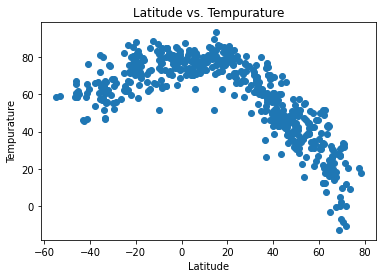

In [34]:
# Generate a scatter plot of Latitude vs. Temperature Plot

#x values
Latitude = weather['Latitude']

#y values
Temp = weather['Temperature']

#Establish Scatter Plot
plt.scatter(Latitude, Temp)

#Chart Formating 
plt.title("Latitude vs. Tempurature")
plt.ylabel("Tempurature")
plt.xlabel("Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

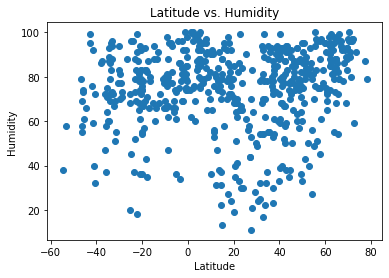

In [35]:
# Generate a scatter plot of Latitude vs. Temperature Plot

#x values
Latitude = weather['Latitude']

#y values
humidity = weather['Humidity']

#Establish Scatter Plot
plt.scatter(Latitude, humidity)

#Chart Formating 
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

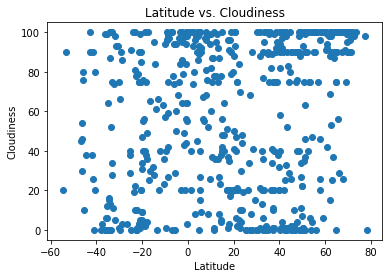

In [36]:
#x values
Latitude = weather['Latitude']

#y values
Cloud = weather['Cloudiness']

#Establish Scatter Plot
plt.scatter(Latitude, Cloud)

#Chart Formating 
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

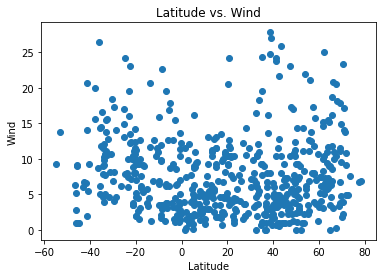

In [37]:
#x values
Latitude = weather['Latitude']

#y values
wind = weather['Wind']

#Establish Scatter Plot
plt.scatter(Latitude, wind)

#Chart Formating 
plt.title("Latitude vs. Wind")
plt.ylabel("Wind")
plt.xlabel("Latitude")

## Linear Regression

In [38]:
northern_data = weather.loc[weather["Latitude"] >= 0]
southern_data = weather.loc[weather["Latitude"] <= 0]


,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Cloudiness,Wind,Country,Date
1,Pevek,69.7008,170.3133,1.92,1.92,93,100,4.74,RU,1635462803
2,Kapit,2.0167,112.9333,73.80,73.80,100,100,0.29,MY,1635462805
3,Cascais,38.6979,-9.4215,65.21,66.51,73,100,3.00,PT,1635462805
4,Den Chai,17.9837,100.0522,77.61,77.61,95,91,2.53,TH,1635462806
10,Qaanaaq,77.4840,-69.3632,20.21,20.21,87,98,6.78,GL,1635462812
...,...,...,...,...,...,...,...,...,...,...
558,Dambulla,7.8600,80.6517,73.51,73.51,95,100,1.43,LK,1635463327
559,Birao,10.2849,22.7882,77.11,77.11,36,60,3.00,CF,1635463328
561,Alim,9.5649,122.4876,79.86,79.86,82,26,5.10,PH,1635463330
562,Bemidji,47.4736,-94.8803,47.37,50.05,93,40,10.36,US,1635463330


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

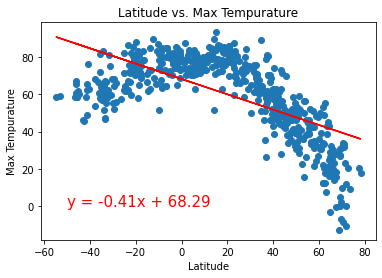

In [90]:
#x values
Latitude = weather['Latitude']

#y values
m_Temp = weather['Max Temperature']

#Establish Scatter Plot
plt.scatter(Latitude, m_Temp)

(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, m_Temp)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Max Tempurature")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.ylabel("Max Tempurature")
plt.xlabel("Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

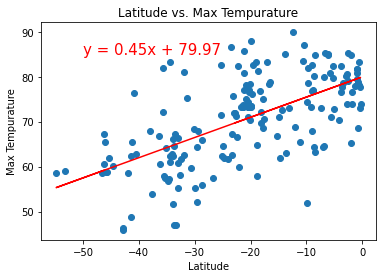

In [89]:
#x values
Latitude = southern_data['Latitude']

#y values
sm_Temp = southern_data['Max Temperature']

#Establish Scatter Plot

plt.scatter(Latitude, sm_Temp)
(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, sm_Temp)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Max Tempurature")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.ylabel("Max Tempurature")
plt.xlabel("Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

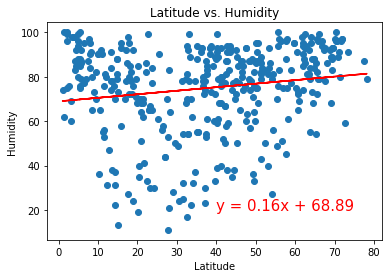

In [86]:
#x values
Latitude = northern_data['Latitude']

#y values
humidity = northern_data['Humidity']

#Establish Scatter Plot
plt.scatter(Latitude, humidity)
(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Humidity")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

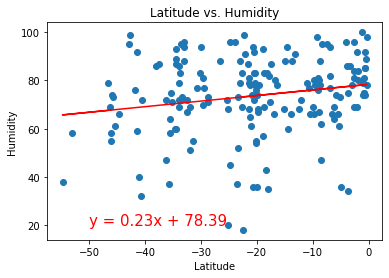

In [84]:
#x values
Latitude = southern_data['Latitude']

#y values
humidity = southern_data['Humidity']

#Establish Scatter Plot
plt.scatter(Latitude, humidity)


(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Humidity")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

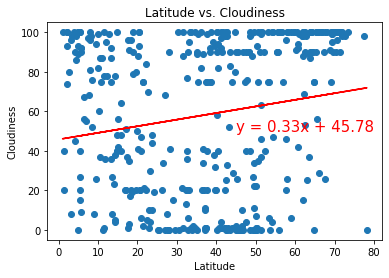

In [74]:
#x values
Latitude = northern_data['Latitude']

#y values
Cloud = northern_data['Cloudiness']

#Establish Scatter Plot
plt.scatter(Latitude, Cloud)

(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, Cloud)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Cloudiness")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

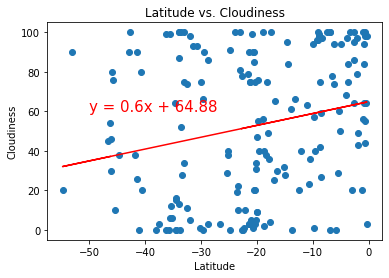

In [69]:
#x values
Latitude = southern_data['Latitude']

#y values
Cloud = southern_data['Cloudiness']

#Establish Scatter Plot
plt.scatter(Latitude, Cloud)

(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, Cloud)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Cloudiness")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

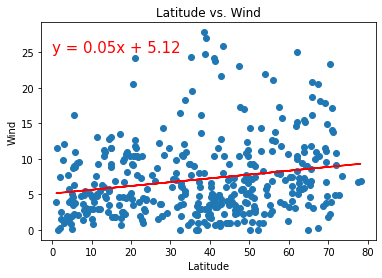

In [77]:
#x values
Latitude = northern_data['Latitude']

#y values
wind = northern_data['Wind']

#Establish Scatter Plot
plt.scatter(Latitude, wind)

(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, wind)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Wind")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.ylabel("Wind")
plt.xlabel("Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

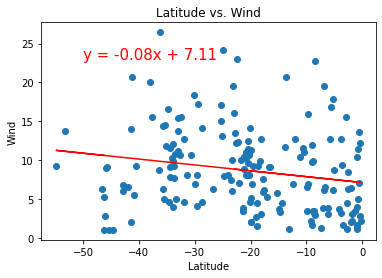

In [80]:
#x values
Latitude = southern_data['Latitude']

#y values
wind = southern_data['Wind']

#Establish Scatter Plot
plt.scatter(Latitude, wind)

(slope, intercept, rvalue, pvalue, std_err) = linregress(Latitude, wind)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Chart Formating 
plt.plot(Latitude ,regress_values,"r-")
plt.title("Latitude vs. Wind")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
plt.ylabel("Wind")
plt.xlabel("Latitude")